# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

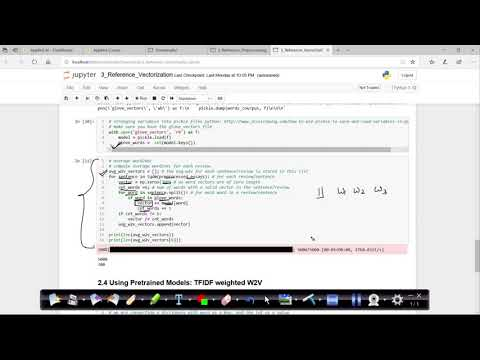

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [341]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Normalizer
import numpy as np
from tqdm import tqdm
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import scipy as sp
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import roc_auc_score
!pip install PrettyTable
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np


In [3]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [4]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Sun
[nltk_data]     Networks\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [7]:
data = pd.read_csv('preprocessed_data.csv')

In [8]:
data.describe()

teacher_number_of_previously_posted_projects  project_is_approved  \
count                                 109248.000000        109248.000000   
mean                                      11.153165             0.848583   
std                                       27.777154             0.358456   
min                                        0.000000             0.000000   
25%                                        0.000000             1.000000   
50%                                        2.000000             1.000000   
75%                                        9.000000             1.000000   
max                                      451.000000             1.000000   

               price  
count  109248.000000  
mean      298.119343  
std       367.498030  
min         0.660000  
25%       104.310000  
50%       206.220000  
75%       379.000000  
max      9999.000000

In [9]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [10]:
data.school_state.describe()

count     109248
unique        51
top           ca
freq       15388
Name: school_state, dtype: object

In [11]:
data.teacher_prefix.describe()

count     109248
unique         5
top          mrs
freq       57272
Name: teacher_prefix, dtype: object

In [12]:
data.project_grade_category.describe()

count            109248
unique                4
top       grades_prek_2
freq              44225
Name: project_grade_category, dtype: object

In [13]:
data.teacher_number_of_previously_posted_projects.describe()

count    109248.000000
mean         11.153165
std          27.777154
min           0.000000
25%           0.000000
50%           2.000000
75%           9.000000
max         451.000000
Name: teacher_number_of_previously_posted_projects, dtype: float64

In [14]:
data.project_is_approved.describe()

count    109248.000000
mean          0.848583
std           0.358456
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: project_is_approved, dtype: float64

In [15]:
data.clean_categories.describe()

count                109248
unique                   51
top       literacy_language
freq                  23655
Name: clean_categories, dtype: object

In [16]:
data.clean_subcategories.describe()

count       109248
unique         401
top       literacy
freq          9486
Name: clean_subcategories, dtype: object

In [17]:
data.price.describe()

count    109248.000000
mean        298.119343
std         367.498030
min           0.660000
25%         104.310000
50%         206.220000
75%         379.000000
max        9999.000000
Name: price, dtype: float64

In [18]:
data.essay.describe()

count                                                109248
unique                                               108353
top       our students come diverse backgrounds blue col...
freq                                                      9
Name: essay, dtype: object

In [19]:
dy = data['project_is_approved'].values
dx = data.drop(['project_is_approved'],axis=1)

print(type(dx),type(dy))


<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [20]:
X_train, X_test, y_train, y_test = train_test_split( dx, dy, test_size=0.33, random_state=42)

print('After spliting the data the size of train and test becomes:')
print('Training data',X_train.shape, y_train.shape)
print('Testing data', X_test.shape ,y_test.shape )

After spliting the data the size of train and test becomes:
Training data (73196, 8) (73196,)
Testing data (36052, 8) (36052,)


<font color='RED'> <b>UNDERSTANDING COLUMN TYPES IN THE DATA</b></font>

- school_state : categorical data
- clean_categories : categorical data
- clean_subcategories : categorical data
- project_grade_category : categorical data
- teacher_prefix : categorical data


- essay : text data
   
   
- teacher_number_of_previously_posted_projects : numerical
- price : numerical

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

In [21]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3><font color='red'> <b>---- VECTORIZING CATEGORICAL FEATURES----</b></font></h3>

- Most Machine Learning algorithms cannot work with categorical data and needs to be converted into numerical data. 
- Sometimes in datasets, we encounter columns that contain categorical features (string values) for example parameter Gender      will have categorical parameters like Male, Female. These labels have no specific order of preference and also since the     data is string labels, machine learning models misinterpreted that there is some sort of hierarchy in them.
- To deal with this issue we will use "One Hot Encoding technique".
- In this technique, the categorical parameters will prepare separate columns for both Male and Female labels. So, wherever  there is Male, the value will be 1 in Male column and 0 in Female column and vice-versa

 

In [206]:
count_vectorizer = CountVectorizer(binary=True)


<font color='RED'> <b>COLUMN : school_state</b></font>

In [222]:
count_vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = count_vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = count_vectorizer.transform(X_test['school_state'].values)

In [225]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAINING DATA:')
print('Number of rows,columns:',X_train_state_ohe.shape)
print('---'*10)
print('TESTING DATA:')
print('Number of rows,columns:',X_test_state_ohe.shape)
print('---'*10)
print("Vocabulary size: {}".format(len(count_vectorizer.vocabulary_)))
print("\nSample 5 feature:\n{}".format(count_vectorizer.get_feature_names_out()[:5]))
features_school_state = list(count_vectorizer.get_feature_names_out())


AFTER VECTORIZATION:
------------------------------
TRAINING DATA:
Number of rows,columns: (73196, 51)
------------------------------
TESTING DATA:
Number of rows,columns: (36052, 51)
------------------------------
Vocabulary size: 51

Sample 5 feature:
['ak' 'al' 'ar' 'az' 'ca']


In [25]:
print("Before vectorizing : ",np.array(X_train['school_state'])[0])
print("After vectorizing:",(X_train_state_ohe.toarray())[0])

Before vectorizing :  la
After vectorizing: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<font color='RED'> <b>COLUMN : project_grade_category</b></font>

In [226]:
count_vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_proj_grade_ohe = count_vectorizer.transform(X_train['project_grade_category'].values)
X_test_proj_grade_ohe = count_vectorizer.transform(X_test['project_grade_category'].values)

In [227]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print('Number of rows,columns:',X_train_proj_grade_ohe.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_proj_grade_ohe.shape)
print('---'*10)
print("Vocabulary size: {}".format(len(count_vectorizer.vocabulary_)))
print("\nSample 5 feature:\n{}".format(count_vectorizer.get_feature_names_out()))
features_project_grade_category = list(count_vectorizer.get_feature_names_out())


AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
Number of rows,columns: (73196, 4)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 4)
------------------------------
Vocabulary size: 4

Sample 5 feature:
['grades_3_5' 'grades_6_8' 'grades_9_12' 'grades_prek_2']


In [28]:
print("Before Vectorization : ",np.array(X_train['project_grade_category'])[0])
print("After Vectorization:",(X_train_proj_grade_ohe.toarray())[0])

Before Vectorization :  grades_3_5
After Vectorization: [1 0 0 0]


<font color='RED'> <b>COLUMN : clean_categories</b></font>

In [231]:
count_vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_category_ohe = count_vectorizer.transform(X_train['clean_categories'].values)
X_test_category_ohe = count_vectorizer.transform(X_test['clean_categories'].values)

In [232]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIn DATA:')
print('Number of rows,columns:',X_train_category_ohe.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_category_ohe.shape)
print('---'*10)
print("Vocabulary size: {}".format(len(count_vectorizer.vocabulary_)))
print("\nSample 5 feature:\n{}".format(count_vectorizer.get_feature_names_out()))
features_clean_categories = list(count_vectorizer.get_feature_names_out())


AFTER VECTORIZATION:
------------------------------
TRAIn DATA:
Number of rows,columns: (73196, 9)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 9)
------------------------------
Vocabulary size: 9

Sample 5 feature:
['appliedlearning' 'care_hunger' 'health_sports' 'history_civics'
 'literacy_language' 'math_science' 'music_arts' 'specialneeds' 'warmth']


In [31]:
print("Before Vectorization : ",np.array(X_train['clean_categories'])[0])
print("After vectorization:",(X_train_category_ohe.toarray())[0])

Before Vectorization :  specialneeds
After vectorization: [0 0 0 0 0 0 0 1 0]


<font color='RED'> <b>COLUMN : clean_subcategories</b></font>

In [233]:
count_vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_category_ohe = count_vectorizer.transform(X_train['clean_subcategories'].values)
X_test_sub_category_ohe = count_vectorizer.transform(X_test['clean_subcategories'].values)

In [234]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print('Number of rows,columns:',X_train_sub_category_ohe.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_sub_category_ohe.shape)
print('*****'*10)
print("Vocabulary size: {}".format(len(count_vectorizer.vocabulary_)))
print("\nSample 5 feature:\n{}".format(count_vectorizer.get_feature_names_out()))
list_categorical_features.append(count_vectorizer.get_feature_names_out())
features_clean_subcategories = list(count_vectorizer.get_feature_names_out())


AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
Number of rows,columns: (73196, 30)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 30)
**************************************************
Vocabulary size: 30

Sample 5 feature:
['appliedsciences' 'care_hunger' 'charactereducation' 'civics_government'
 'college_careerprep' 'communityservice' 'earlydevelopment' 'economics'
 'environmentalscience' 'esl' 'extracurricular' 'financialliteracy'
 'foreignlanguages' 'gym_fitness' 'health_lifescience' 'health_wellness'
 'history_geography' 'literacy' 'literature_writing' 'mathematics' 'music'
 'nutritioneducation' 'other' 'parentinvolvement' 'performingarts'
 'socialsciences' 'specialneeds' 'teamsports' 'visualarts' 'warmth']


In [235]:
print("Before Vectorization : ",np.array(X_train['clean_subcategories'])[0])
print("After Vectorization:",(X_train_sub_category_ohe.toarray())[0])

Before Vectorization :  specialneeds
After Vectorization: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


<font color='RED'> <b>COLUMN : teacher_prefix</b></font>

In [236]:
count_vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tprefix_ohe = count_vectorizer.transform(X_train['teacher_prefix'].values)
X_test_tprefix_ohe = count_vectorizer.transform(X_test['teacher_prefix'].values)

In [237]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print('Number of rows,columns:',X_train_tprefix_ohe.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_tprefix_ohe.shape)
print('*****'*10)
print("Vocabulary size: {}".format(len(count_vectorizer.vocabulary_)))
print("\nSample 5 feature:\n{}".format(count_vectorizer.get_feature_names_out()))
features_teacher_prefix = list(count_vectorizer.get_feature_names_out())


AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
Number of rows,columns: (73196, 5)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 5)
**************************************************
Vocabulary size: 5

Sample 5 feature:
['dr' 'mr' 'mrs' 'ms' 'teacher']


In [238]:
print("Before Vectorization : ",np.array(X_train['teacher_prefix'])[0])
print("After Vectorization:",(X_train_tprefix_ohe.toarray())[0])

Before Vectorization :  mrs
After Vectorization: [0 0 1 0 0]


In [38]:
from scipy.sparse import hstack

categorical_train = hstack((X_train_state_ohe,X_train_proj_grade_ohe,X_train_category_ohe,X_train_sub_category_ohe,X_train_tprefix_ohe))
categorical_test = hstack((X_test_state_ohe,X_test_proj_grade_ohe,X_test_category_ohe,X_test_sub_category_ohe,X_test_tprefix_ohe))

In [205]:
print(categorical_train.shape)
print(categorical_test.shape)


(73196, 99)
(36052, 99)


In [244]:
categoricalfeatures = features_school_state+features_project_grade_category+features_clean_categories+features_clean_subcategories+features_teacher_prefix


<h3><font color='red'> <b>----> VECTORIZING TEXT DATA <----</b></font></h3>

**<font color='red'> <b>TF-IDF for column :ESSAY </b></font>**

- **TF-IDF vectorizes/scores a word by multiplying the word's Term Frequency (TF) with the Inverse Document Frequency (IDF).**
- **Term Frequency:**  of a term or word is the number of times the term appears in a document compared to the total number    of words in the document.
- **Inverse Document Frequency:** IDF of a term reflects the proportion of documents in the corpus that contain the term.ords unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).

In [245]:
tfidfvectorizer = TfidfVectorizer(min_df=10, max_features=10000)
tfidfvectorizer.fit(list(X_train['essay']))


TfidfVectorizer(max_features=10000, min_df=10)

In [41]:
X_train_essay_tfidf = tfidfvectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = tfidfvectorizer.transform(X_test['essay'].values)

In [42]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print('Number of rows,columns:',X_train_essay_tfidf.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_essay_tfidf.shape)

AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
Number of rows,columns: (73196, 10000)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 10000)


In [258]:
features_tfidf = list(tfidfvectorizer.get_feature_names_out())


<font color='red'> <b>TF-IDF w2v ON column :ESSAY </b></font>

In [43]:
def tfidf_w2v(data,vectorizer):
    tfidf_words = set(vectorizer.get_feature_names_out())
    tfidf_idf = list(vectorizer.idf_)
    # we are converting a dictionary with word as a key, and the idf_ as a value
    dictionary = dict(zip(tfidf_words,tfidf_idf))
    
    tfidf_w2v_vectors = [] # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tfidf_weight = 0 # # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word 
                # here we are multiplying idf value(dictionary[word]) and 
                # the tf value((sentence.count(word)/len(sentence.split())))
                tfidf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
                vector += (vec*tfidf) # calculating tfidf weighted w2v
                tfidf_weight+=tfidf
        if  tfidf_weight != 0 :
            vector/=tfidf_weight
        tfidf_w2v_vectors.append(vector)  
        
    return tfidf_w2v_vectors

In [44]:
%%time
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_vectorizer.fit(list(X_train['essay']))
X_train_tfidf_w2v = tfidf_w2v(X_train['essay'],tfidf_vectorizer)
X_test_tfidf_w2v = tfidf_w2v(X_test['essay'],tfidf_vectorizer)

100%|██████████| 36052/36052 [02:45<00:00, 217.90it/s]

CPU times: total: 8min 27s
Wall time: 8min 37s


In [45]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print(len(X_train_tfidf_w2v))
print('---'*10)
print('TEST DATA:')
print(len(X_test_tfidf_w2v))

AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
73196
------------------------------
TEST DATA:
36052


<font color='red'> <b>SENTIMENTAL ANALYSIS ON COLUMN :ESSAY </b></font>

**Sentiment Analysis** is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

In [253]:
def sentiment_scores(column):
    sentiment_score_dict = []
 
    # Create a SentimentIntensityAnalyzer object.
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound score
    sid_obj = SentimentIntensityAnalyzer()
    for sentence in tqdm(column):
        sentiment_dict = sid_obj.polarity_scores(sentence)
        sentiment_score_dict.append(sentiment_dict)
        
        
    return sentiment_score_dict

In [254]:
X_train_senti = sentiment_scores(X_train['essay'])
X_train_sentimental_Scores = pd.DataFrame(X_train_senti)

100%|██████████| 73196/73196 [05:10<00:00, 235.96it/s]


In [48]:
print("Number of rows,column:",X_train_sentimental_Scores.shape)
X_train_sentimental_Scores.head()

Number of rows,column: (73196, 4)


neg    neu    pos  compound
0  0.017  0.705  0.278    0.9893
1  0.000  0.802  0.198    0.9856
2  0.026  0.728  0.245    0.9969
3  0.061  0.616  0.323    0.9876
4  0.106  0.600  0.295    0.9775

In [49]:
X_test_senti = sentiment_scores(X_test['essay'])
X_test_sentimental_Scores = pd.DataFrame(X_test_senti)

100%|██████████| 36052/36052 [02:28<00:00, 243.43it/s]


In [50]:
print("Number of rows,column:",X_test_sentimental_Scores.shape)
X_test_sentimental_Scores.head()

Number of rows,column: (36052, 4)


neg    neu    pos  compound
0  0.011  0.642  0.347    0.9906
1  0.050  0.772  0.178    0.9738
2  0.055  0.586  0.359    0.9931
3  0.086  0.705  0.209    0.9756
4  0.033  0.611  0.356    0.9961

In [257]:
features_sentimental_scores = X_train_sentimental_Scores.columns

<h3><font color='red'> <b>----> VECTORIZING NUMERICAL DATA <----</b></font></h3>

In [51]:
from sklearn.preprocessing import Normalizer
import warnings 
warnings.filterwarnings("ignore") 

<font color='red'> <b>COLUMN : teacher_number_of_previously_posted_projects </b></font>

In [52]:
num_scalar = Normalizer()
num_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_train_teacher_norm = num_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [53]:
num_scalar.fit(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_test_teacher_norm = num_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))    

In [54]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print('Number of rows,columns:',X_train_teacher_norm.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_teacher_norm.shape)

AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
Number of rows,columns: (73196, 1)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 1)


<font color='red'> <b>COLUMN : price </b></font>

In [55]:
num_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_train_price_norm = num_scalar.transform(X_train['price'].values.reshape(-1,1))    

In [56]:
num_scalar.fit(X_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_test_price_norm = num_scalar.transform(X_test['price'].values.reshape(-1,1))

In [57]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print('Number of rows,columns:',X_train_price_norm.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_price_norm.shape)

AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
Number of rows,columns: (73196, 1)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 1)


In [58]:

numerical_train = hstack((sp.sparse.csr_matrix(X_train_teacher_norm),X_train_price_norm))
numerical_test = hstack((sp.sparse.csr_matrix(X_test_teacher_norm),X_test_price_norm))

In [260]:
numerical_features = []
numerical_features.append('teacher_number_of_previously_posted_projects')
numerical_features.append('price')

<font color='red'> <b> COLUMN: Sentimental Analysis </b></font>

In [59]:
num_scalar.fit(X_train_sentimental_Scores['neg'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_train_sentimental_neg = num_scalar.transform(X_train_sentimental_Scores['neg'].values.reshape(-1,1))    

In [60]:
num_scalar.fit(X_test_sentimental_Scores['neg'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_test_sentimental_neg = num_scalar.transform(X_test_sentimental_Scores['neg'].values.reshape(-1,1))    

In [61]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print('Number of rows,columns:',X_train_sentimental_neg.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_sentimental_neg.shape)

AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
Number of rows,columns: (73196, 1)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 1)


In [62]:
num_scalar.fit(X_train_sentimental_Scores['neu'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_train_sentimental_neu = num_scalar.transform(X_train_sentimental_Scores['neu'].values.reshape(-1,1))    

In [63]:
num_scalar.fit(X_test_sentimental_Scores['neu'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_test_sentimental_neu = num_scalar.transform(X_test_sentimental_Scores['neu'].values.reshape(-1,1))    

In [64]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print('Number of rows,columns:',X_train_sentimental_neu.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_sentimental_neu.shape)

AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
Number of rows,columns: (73196, 1)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 1)


In [65]:
num_scalar.fit(X_train_sentimental_Scores['pos'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_train_sentimental_pos = num_scalar.transform(X_train_sentimental_Scores['pos'].values.reshape(-1,1))    

In [66]:
num_scalar.fit(X_test_sentimental_Scores['pos'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_test_sentimental_pos = num_scalar.transform(X_test_sentimental_Scores['pos'].values.reshape(-1,1))    

In [67]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print('Number of rows,columns:',X_train_sentimental_pos.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_sentimental_pos.shape)

AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
Number of rows,columns: (73196, 1)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 1)


In [68]:
num_scalar.fit(X_train_sentimental_Scores['compound'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_train_sentimental_com = num_scalar.transform(X_train_sentimental_Scores['compound'].values.reshape(-1,1))    

In [69]:
num_scalar.fit(X_test_sentimental_Scores['compound'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
X_test_sentimental_com = num_scalar.transform(X_test_sentimental_Scores['compound'].values.reshape(-1,1))    

In [70]:
print('AFTER VECTORIZATION:')
print('---'*10)
print('TRAIN DATA:')
print('Number of rows,columns:',X_train_sentimental_com.shape)
print('---'*10)
print('TEST DATA:')
print('Number of rows,columns:',X_test_sentimental_com.shape)

AFTER VECTORIZATION:
------------------------------
TRAIN DATA:
Number of rows,columns: (73196, 1)
------------------------------
TEST DATA:
Number of rows,columns: (36052, 1)


In [71]:

X_train_sentimental_Scores = hstack((sp.sparse.csr_matrix(X_train_sentimental_neg),X_train_sentimental_neu,X_train_sentimental_pos,X_train_sentimental_com))
X_test_sentimental_Scores = hstack((sp.sparse.csr_matrix(X_test_sentimental_neg),X_test_sentimental_neu,X_test_sentimental_pos,X_test_sentimental_com))

In [72]:
X_train_sentimental_Scores.shape

(73196, 4)

<h3><font color='red'> <b>----> SETS <----</b></font></h3>

<li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>

In [73]:
set1_train = hstack((categorical_train,numerical_train,X_train_essay_tfidf,X_train_sentimental_Scores))
set1_test = hstack((categorical_test,numerical_test,X_test_essay_tfidf,X_test_sentimental_Scores))

In [74]:
print("SET-1 TRAIN DATA")
print("Number of row and columns",set1_train.shape)
print('---'*15)
print("SET-1 TEST DATA")
print("Number of row and columns",set1_test.shape)

SET-1 TRAIN DATA
Number of row and columns (73196, 10105)
---------------------------------------------
SET-1 TEST DATA
Number of row and columns (36052, 10105)


In [75]:
set2_train = hstack((categorical_train,numerical_train,X_train_tfidf_w2v,X_train_sentimental_Scores))
set2_test = hstack((categorical_test,numerical_test,X_test_tfidf_w2v,X_test_sentimental_Scores))

In [76]:
print("SET-2 TRAIN DATA")
print("Number of row and columns",set2_train.shape)
print('---'*15)
print("SET-2 TEST DATA")
print("Number of row and columns",set2_test.shape)

SET-2 TRAIN DATA
Number of row and columns (73196, 405)
---------------------------------------------
SET-2 TEST DATA
Number of row and columns (36052, 405)


<h3><font color='red'> <b>----> APPLYING DTClassifier AND HYPERPARAMETER TUNING FOR SET-1<----</b></font></h3>

In [77]:
dt_classifier = DecisionTreeClassifier()
param_distributions = dict(max_depth=[1, 5, 10, 50],min_samples_split=[5, 10, 100, 500])

In [78]:

clf_set1 = GridSearchCV(dt_classifier, param_distributions,cv=3,scoring='roc_auc', return_train_score=True, n_jobs= -1)
search_set1 = clf_set1.fit(set1_train, y_train)
search_set1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [79]:
dt_clf_set1 = DecisionTreeClassifier(min_samples_split = search_set1.best_params_['min_samples_split'], max_depth = search_set1.best_params_['max_depth'])
dt_clf_set1.fit(set1_train, y_train)


 max roc_auc_score for set_1 =  0.5055397750476642


In [132]:
set1_pred_test = dt_clf_set1.predict(set1_test)
print("roc_auc_score for set_1 test data = ",roc_auc_score(y_test, set1_pred_test))
set1_pred_train = dt_clf_set1.predict(set1_train)
print("roc_auc_score for set_1 train data = ",roc_auc_score(y_train, set1_pred_train))

roc_auc_score for set_1 test data =  0.5055397750476642
roc_auc_score for set_1 train data =  0.5244480468948672


In [80]:
results_set1  = pd.DataFrame(clf_set1.cv_results_)

In [81]:
train_auc= results_set1['mean_train_score']
train_auc_std= results_set1['std_train_score']
cv_auc = results_set1['mean_test_score'] 
cv_auc_std= results_set1['std_test_score']

In [82]:
min_sam_split = results_set1['param_min_samples_split']
max_depth = results_set1['param_max_depth']

In [90]:
x1 = list(max_depth)
y1 = list(min_sam_split)
z1 = list(train_auc)

x2 = list(max_depth)
y2 = list(min_sam_split)
z2 = list(cv_auc)



In [111]:
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train',marker=dict(size=12,colorscale='viridis',opacity=0.8))
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation',marker=dict(size=12,colorscale='viridis',opacity=0.8))
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_sample_split'),
        zaxis = dict(title='AUC_score'),))

fig = go.Figure(data=data, layout=layout)

fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
offline.iplot(fig, filename='3d-scatter-colorscale')


In [136]:
def error_plots (y_train_pred,y_test_pred,y_train,y_test):
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

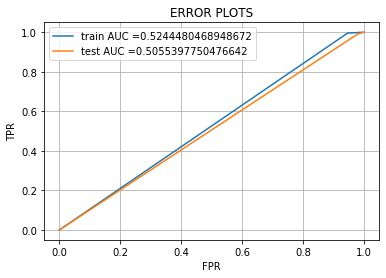

In [137]:
error_plots (set1_pred_train,set1_pred_test,y_train,y_test)

In [143]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    labels = [0,1]
    # representing A in heatmap format
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

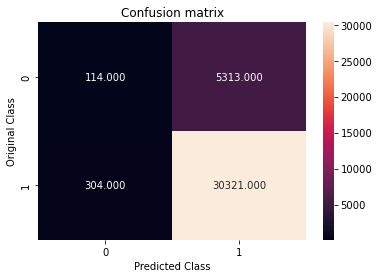

In [144]:
plot_confusion_matrix(y_test, set1_pred_test)

In [162]:
from wordcloud import WordCloud, STOPWORDS

def getWordCloud(y_test,y_pred):
    df_y_test_y_pred = df = pd.DataFrame(list(zip(y_test, set1_pred_test )), columns =['y_test', 'y_pred'])
    df_false_positives =  df_y_test_y_pred[(df_y_test_y_pred['y_test'] == 0) & (df_y_test_y_pred['y_pred'] ==1)]
    data_false_positives = X_test
    data_false_positives = data_false_positives[data_false_positives.index.isin(df_false_positives.index)]
    l1 = list(data_false_positives["essay"])
    giant_list = [] # for storing every word in all of the sentances
    for sentance in l1:
        temp_list = sentance.split()
        giant_list = giant_list + temp_list 
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(str(giant_list)) 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    plt.show() 

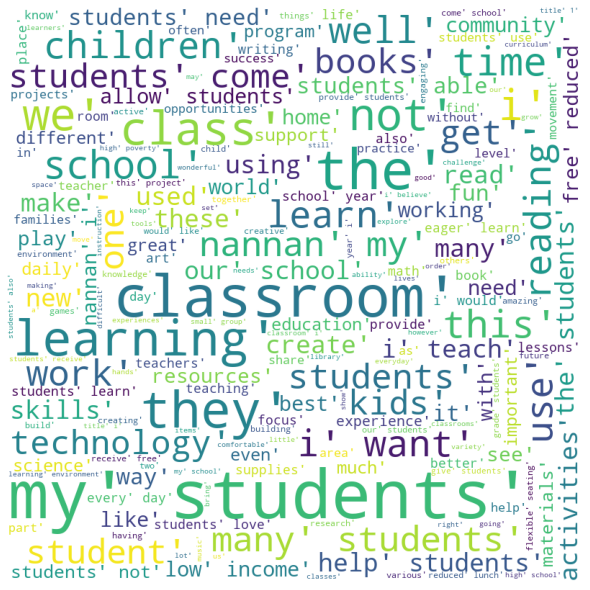

In [163]:
getWordCloud(y_test,set1_pred_test)

In [176]:
def plotBoxPlot(y_pred, y_test, X_test):
    fp_price = []
    
    for i, y in enumerate(y_pred):
        if y_pred and not y_test[i]:
            fp_price.append(X_test['price'].iloc[i])
    
    plt.boxplot(fp_price)
    plt.title('Box plot on price of false-positive test data points')
    #plt.xticks('')
    plt.ylabel('Price.')
    plt.grid()
    plt.show()

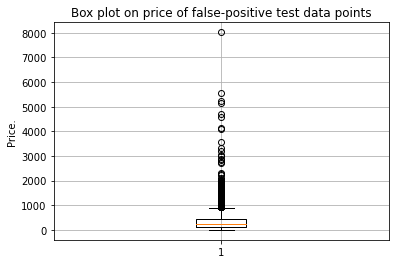

In [177]:
plotBoxPlot(list(set1_pred_test), np.array(y_test), X_test)

In [179]:
def plotPDF(y_pred, y_test, X_test):
    x_axis1 = 'teacher_number_of_previously_posted_projects'
    legend1 = 'False-Positive test data points'
    fp_tnppp = []
    
    for i, y in enumerate(y_pred):
        if y_pred and not y_test[i]:
            fp_tnppp.append(X_test[x_axis1].iloc[i])
    
    plt.figure(figsize=(10,3))
    sns.distplot(fp_tnppp, label=legend1, hist=False)
    plt.title("PDF of No. of previously posted projects of False-Positive test data points")
    plt.xlabel(x_axis1)
    plt.legend()
    plt.show()

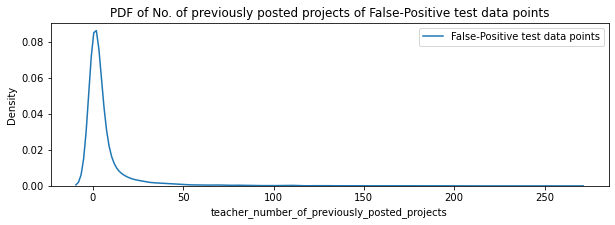

In [181]:
plotPDF(list(set1_pred_test), np.array(y_test), X_test)

<h3><font color='red'> <b>----> APPLYING DTClassifier AND HYPERPARAMETER TUNING FOR SET-2<----</b></font></h3>

In [94]:
clf_set2 = GridSearchCV(dt_classifier, param_distributions,cv=3,scoring='roc_auc', return_train_score=True, n_jobs= -1)
search_set2 = clf_set2.fit(set2_train, y_train)
search_set2.best_params_

CPU times: total: 0 ns
Wall time: 0 ns


{'max_depth': 5, 'min_samples_split': 500}

In [95]:
dt_clf_set2 = DecisionTreeClassifier(min_samples_split = search_set2.best_params_['min_samples_split'], max_depth = search_set2.best_params_['max_depth'])
dt_clf_set2.fit(set2_train, y_train)


 max roc_auc_score for set_2 =  0.500734745020175


In [139]:
set2_pred_test = dt_clf_set2.predict(set2_test)
print(" roc_auc_score for set_2 test = ",roc_auc_score(y_test, set2_pred_test))
set2_pred_train = dt_clf_set2.predict(set2_train)
print(" roc_auc_score for set_2 test = ",roc_auc_score(y_train, set2_pred_train))

 roc_auc_score for set_2 test =  0.500734745020175
 roc_auc_score for set_2 test =  0.5025729405816033


In [96]:
results_set2  = pd.DataFrame(clf_set2.cv_results_)

In [329]:
train_auc2= results_set2['mean_train_score']
train_auc_std2= results_set2['std_train_score']
cv_auc2 = results_set2['mean_test_score'] 
cv_auc_std2= results_set2['std_test_score']
min_sam_split2 = results_set2['param_min_samples_split']
max_depth2 = results_set2['param_max_depth']

In [330]:

x3 = list(max_depth)
y3 = list(min_sam_split)
z3 = list(train_auc)

x4 = list(max_depth)
y4 = list(min_sam_split)
z4 = list(cv_auc)
trace1 = go.Scatter3d(x=x3,y=y3,z=z3, name = 'train',marker=dict(size=12,colorscale='viridis',opacity=0.8))
trace2 = go.Scatter3d(x=x4,y=y4,z=z4, name = 'Cross validation',marker=dict(size=12,colorscale='viridis',opacity=0.8))
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_sample_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)

fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
offline.iplot(fig, filename='3d-scatter-colorscale')


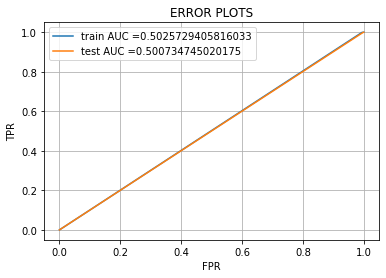

In [140]:
error_plots (set2_pred_train,set2_pred_test,y_train,y_test)

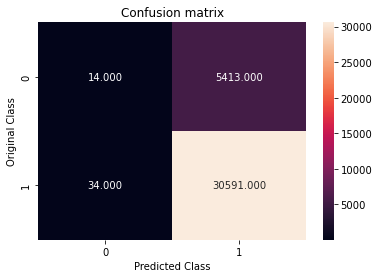

In [145]:
plot_confusion_matrix(y_test, set2_pred_test)

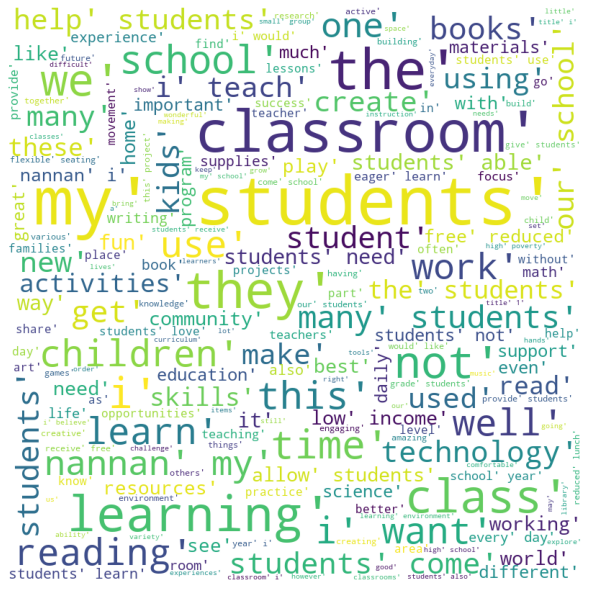

In [159]:
getWordCloud(y_test,set2_pred_test)

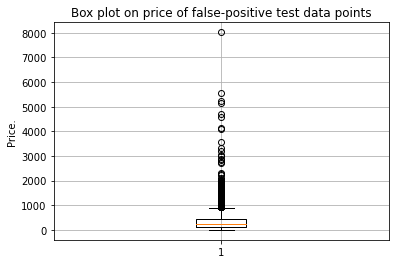

In [178]:
plotBoxPlot(list(set2_pred_test), np.array(y_test), X_test)

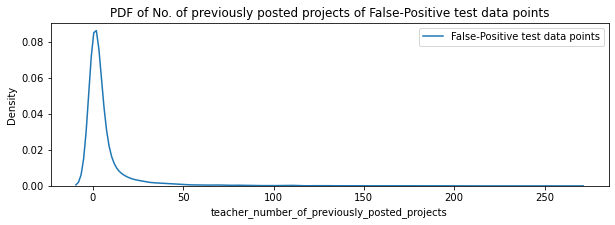

In [182]:
plotPDF(list(set2_pred_test), np.array(y_test), X_test)

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='red'> <b> CALCULATING FEATURE IMPORTANCE FOR SET1</b></font>
 <br>**Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.<br>

In [286]:
dt_classifier = DecisionTreeClassifier(min_samples_split = search_set1.best_params_['min_samples_split'])
dt_classifier.fit(set1_train,y_train)

DecisionTreeClassifier(min_samples_split=500)

In [266]:
set1_train = hstack((categorical_train,numerical_train,X_train_essay_tfidf,X_train_sentimental_Scores))
set1_features = categoricalfeatures + numerical_features + features_tfidf + list(features_sentimental_scores)

In [294]:
feat_dict= {}
for col, val in (zip(set1_features, dt_classifier.feature_importances_)):
    feat_dict[col]=val
    
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df    

Feature  Importance
0          ak    0.000000
1          al    0.000000
2          ar    0.000000
3          az    0.000000
4          ca    0.000000
...       ...         ...
10045    zoom    0.000000
10046   zumba    0.000000
10047     neg    0.001165
10048     neu    0.002475
10049     pos    0.000622

[10050 rows x 2 columns]

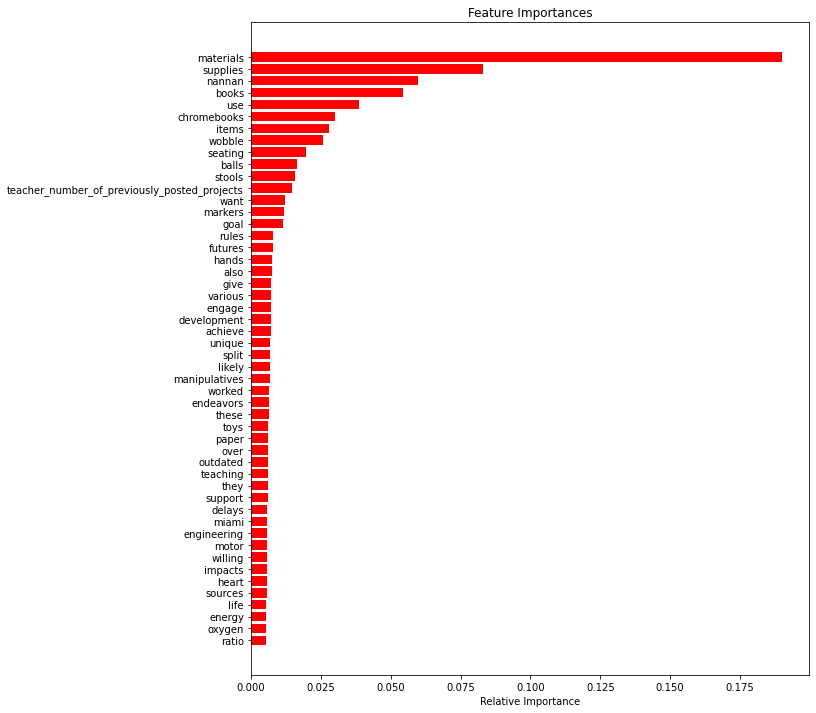

In [298]:
features = set1_features
importances = dt_clf_set1.feature_importances_
indices = (np.argsort(importances))[-50:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [308]:
imp_features_list = []
imp_features_index = []
for index, row in feat_df.iterrows():
    if row["Importance"] > 0.0:
        imp_features_list.append(row["Feature"])
        imp_features_index.append(index)
        
print("Number of Important features greater than zero are = ",len(imp_features_list))
print('---'*15)
print(imp_features_list)

Number of Important features greater than zero are =  2573
---------------------------------------------
['co', 'hi', 'in', 'ok', 'pa', 'va', 'wi', 'wy', 'economics', 'literacy', 'mathematics', 'other', 'dr', 'mrs', 'teacher', 'teacher_number_of_previously_posted_projects', '000', '10', '100', '1000', '10th', '11', '110', '11th', '12th', '15', '17', '18', '19', '200', '2009', '20th', '21st', '24', '2nd', '300', '34', '350', '3doodlers', '40', '400', '45', '4th', '50', '5k', '61', '63', '64', '69', '6th', '70', '74', '750', '76', '77', '7th', '800', '82', '85', '850', '86', '89', '8th', '94', '98', 'abandoned', 'abcs', 'abilities', 'about', 'abstract', 'abuse', 'academics', 'academy', 'accelerated', 'acceptable', 'access', 'accident', 'accommodating', 'accommodations', 'accompanying', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'according', 'account', 'achieve', 'achieving', 'acknowledged', 'acquired', 'actively', 'activities', 'actual', 'actually', 'ad', 'adaptat

<font color='red'> <b> DATASET WITH ONLY IMPORTANT FEATURES</b></font>


In [311]:
set1_test = set1_test.tocsr()
set1_train = set1_train.tocsr()

set3_test = set1_test[:, imp_features_index]
set3_train = set1_train[:, imp_features_index]

In [312]:
set3_train.shape

(73196, 2573)

In [313]:
set3_test.shape

(36052, 2573)

<font color='red'> <b> APPLYING LOGISTIC REGRESSION FOR ABOVE</b></font>


In [324]:
model = LogisticRegression()

c_values = [100, 10, 1.0, 0.1, 0.01]
penalty = ['l1', 'l2']

grid = dict(C=c_values,penalty=penalty)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='roc_auc',return_train_score=True)

grid_result = grid_search.fit(set3_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.655734 using {'C': 1.0, 'penalty': 'l2'}


In [325]:
logistic_regression = LogisticRegression(C = grid_result.best_params_['C'],penalty =grid_result.best_params_['penalty'], random_state=0)
logistic_regression.fit(set3_train, y_train)


LogisticRegression(random_state=0)

In [326]:
set3_pred_test = logistic_regression.predict(set3_test)
print(" roc_auc_score for set_3 test = ",roc_auc_score(y_test, set3_pred_test))
set3_pred_train = logistic_regression.predict(set3_train)
print(" roc_auc_score for set_3 test = ",roc_auc_score(y_train, set3_pred_train))

 roc_auc_score for set_3 test =  0.5008070336149938
 roc_auc_score for set_3 test =  0.5005653476253431


In [327]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.070294      0.012029         0.000000        0.000000     100   
1       3.223491      0.165338         0.039311        0.006843     100   
2       0.074962      0.012351         0.000000        0.000000      10   
3       3.157606      0.154294         0.037976        0.006370      10   
4       0.066298      0.003768         0.000000        0.000000     1.0   
5       3.248447      0.044703         0.034314        0.002622     1.0   
6       0.055639      0.002057         0.000000        0.000000     0.1   
7       2.788567      0.045520         0.034313        0.001703     0.1   
8       0.053639      0.000471         0.000000        0.000000    0.01   
9       0.876495      0.054271         0.027317        0.006179    0.01   

  param_penalty                        params  split0_test_score  \
0            l1   {'C': 100, 'penalty': 'l1'}                NaN   
1            l2   {'C': 100, 'penalty': 'l2'}           0.649351   
2            l1    {'C': 10, 'penalty': 'l1'}                NaN   
3            l2    {'C': 10, 'penalty': 'l2'}           0.652127   
4            l1   {'C': 1.0, 'penalty': 'l1'}                NaN   
5            l2   {'C': 1.0, 'penalty': 'l2'}           0.658558   
6            l1   {'C': 0.1, 'penalty': 'l1'}                NaN   
7            l2   {'C': 0.1, 'penalty': 'l2'}           0.631948   
8            l1  {'C': 0.01, 'penalty': 'l1'}                NaN   
9            l2  {'C': 0.01, 'penalty': 'l2'}           0.578439   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0                NaN                NaN              NaN             NaN   
1           0.642840           0.644578         0.645590        0.002753   
2                NaN                NaN              NaN             NaN   
3           0.645935           0.647999         0.648687        0.002575   
4                NaN                NaN              NaN             NaN   
5           0.653183           0.655461         0.655734        0.002203   
6                NaN                NaN              NaN             NaN   
7           0.626674           0.633432         0.630685        0.002900   
8                NaN                NaN              NaN             NaN   
9           0.575970           0.583518         0.579309        0.003143   

   rank_test_score  split0_train_score  split1_train_score  \
0                6                 NaN                 NaN   
1                3            0.724666            0.728886   
2                7                 NaN                 NaN   
3                2            0.724465            0.731480   
4                8                 NaN                 NaN   
5                1            0.705768            0.708496   
6                9                 NaN                 NaN   
7                4            0.650549            0.654047   
8               10                 NaN                 NaN   
9                5            0.586092            0.590336   

   split2_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            0.726395          0.726649         0.001732  
2                 NaN               NaN              NaN  
3            0.727705          0.727884         0.002867  
4                 NaN               NaN              NaN  
5            0.706531          0.706932         0.001149  
6                 NaN               NaN              NaN  
7            0.651407          0.652001         0.001489  
8                 NaN               NaN              NaN  
9            0.585878          0.587435         0.002053

In [328]:
results_set3  = pd.DataFrame(grid_search.cv_results_)

train_auc3= results_set3['mean_train_score']
train_auc_std3= results_set3['std_train_score']
cv_auc3 = results_set3['mean_test_score'] 
cv_auc_std3= results_set3['std_test_score']
parmc_3 = results_set3['param_C']
param_penalty = results_set3['param_penalty']

x5 = list(parmc_3)
y5 = list(param_penalty)
z5 = list(train_auc)

x6 = list(parmc_3)
y6 = list(param_penalty)
z6 = list(cv_auc)
trace1 = go.Scatter3d(x=x5,y=y5,z=z5, name = 'train',marker=dict(size=12,colorscale='viridis',opacity=0.8))
trace2 = go.Scatter3d(x=x6,y=y6,z=z6, name = 'Cross validation',marker=dict(size=12,colorscale='viridis',opacity=0.8))
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_sample_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)

fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
offline.iplot(fig, filename='3d-scatter-colorscale')


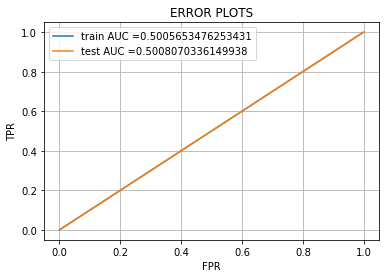

In [331]:
error_plots (set3_pred_train,set3_pred_test,y_train,y_test)

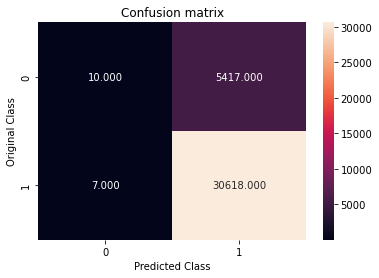

In [332]:
plot_confusion_matrix(y_test, set3_pred_test)

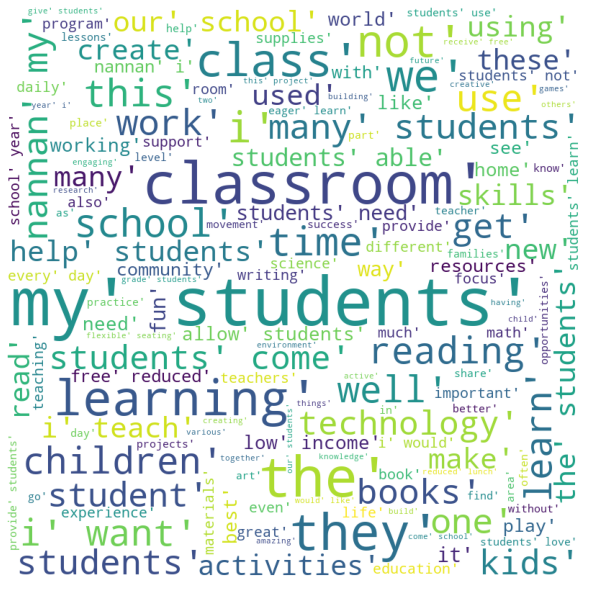

In [333]:
getWordCloud(y_test,set3_pred_test)

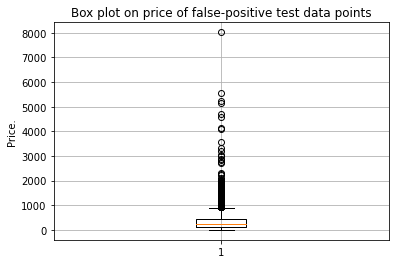

In [334]:
plotBoxPlot(list(set3_pred_test), np.array(y_test), X_test)

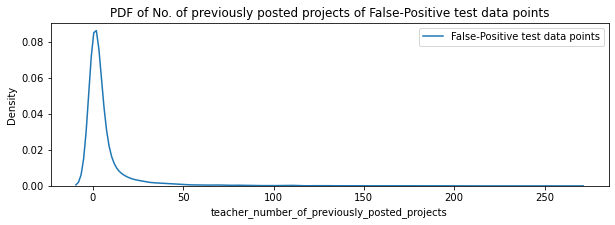

In [335]:
plotPDF(list(set3_pred_test), np.array(y_test), X_test)

In [340]:
table = PrettyTable()
table.field_names = ["Vectorizer","Model", "Hyper Parameter", "AUC"]

table.add_row(["TFIDF", "Brute",search_set1.best_params_, roc_auc_score(y_test, set1_pred_test)])
table.add_row(["TFIDF_W2V","Brute", search_set2.best_params_, roc_auc_score(y_test, set2_pred_test)])
table.add_row(["TFIDF 5k","Brute", grid_result.best_params_, roc_auc_score(y_test, set3_pred_test)])

print (table)

+------------+-------+---------------------------------------------+--------------------+
| Vectorizer | Model |               Hyper Parameter               |        AUC         |
+------------+-------+---------------------------------------------+--------------------+
|   TFIDF    | Brute | {'max_depth': 10, 'min_samples_split': 500} | 0.5055397750476642 |
| TFIDF_W2V  | Brute |  {'max_depth': 5, 'min_samples_split': 500} | 0.500734745020175  |
|  TFIDF 5k  | Brute |         {'C': 1.0, 'penalty': 'l2'}         | 0.5008070336149938 |
+------------+-------+---------------------------------------------+--------------------+
